<a href="https://colab.research.google.com/github/haynis/Assessment_1_WebFramework/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Buiness Understanding
Provides a data science solution to predict the processing time of the digital video conversion process where the video conversion processing time is divided into several categories, wehich are Fast, Medium, and Slow.

In [183]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

#Data Understanding
This stage is the process of understanding the data to be
used as material to be studied to be able to proceed to the preprocessing stage. metrics used to identify model performance and speed classification are 'video', 'tc_width', 'tc_frame_class', 'width', 'frame_class', 'bitrate', 'tc_bitrate', 'codec' and 'label'.

In [184]:
#read data
df= pd.read_csv('problem_1_train.csv')
print(df.head())

   video  duration   width  height     frame_class   bitrate  \
0      1     282.6   640.0   480.0  High Framerate       NaN   
1      2     339.7   640.0   480.0  High Framerate       NaN   
2      3     239.1   480.0   360.0  High Framerate  500198.0   
3      4     714.4  1280.0   720.0  High Framerate  652356.0   
4      5     645.8   320.0   240.0             NaN   95903.0   

   intracoded_frame  predicted_frame  total_frame  intracoded_size  \
0               NaN           6920.0       7065.0              NaN   
1             181.0          10010.0      10191.0              NaN   
2               NaN           5868.0          NaN        1406751.0   
3             143.0              NaN          NaN       14532530.0   
4             138.0          16008.0      16146.0              NaN   

   predicted_size  total_size codec  tc_width  tc_height  tc_frame_class  \
0      14806840.0  19773349.0  h264       NaN      360.0   Low Framerate   
1        820261.0         NaN   NaN    192

In [185]:
#Data Shape, Info, and Number of each Class
df.shape
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48148 entries, 0 to 48147
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video             48148 non-null  int64  
 1   duration          39458 non-null  float64
 2   width             39480 non-null  float64
 3   height            39560 non-null  float64
 4   frame_class       39454 non-null  object 
 5   bitrate           39415 non-null  float64
 6   intracoded_frame  39348 non-null  float64
 7   predicted_frame   39576 non-null  float64
 8   total_frame       39647 non-null  float64
 9   intracoded_size   39377 non-null  float64
 10  predicted_size    39602 non-null  float64
 11  total_size        39459 non-null  float64
 12  codec             39616 non-null  object 
 13  tc_width          39472 non-null  float64
 14  tc_height         39519 non-null  float64
 15  tc_frame_class    39457 non-null  object 
 16  tc_bitrate        39704 non-null  float6

Medium    24096
Fast      12138
Slow      11914
Name: label, dtype: int64

#Data Preparation
This stage the dataset will go through several stages of data cleaning such as ensuring there are no missing values, data duplication, and categorizing columns into numeric.

In [187]:
data_clean= df.dropna()
data_clean

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,label
27,28,256.2,176.0,144.0,Low Framerate,57565.0,56.0,3018.0,3074.0,302900.0,1540700.0,1843600.0,mpeg4,320.0,240.0,High Framerate,820000.0,Fast
49,50,143.0,176.0,144.0,Low Framerate,51082.0,31.0,1685.0,1716.0,56405.0,856907.0,913312.0,mpeg4,480.0,360.0,High Framerate,820000.0,Medium
55,56,176.9,480.0,360.0,High Framerate,26968.0,38.0,4382.0,4420.0,393395.0,202954.0,596349.0,vp8,1280.0,720.0,High Framerate,109000.0,Slow
67,68,176.9,480.0,360.0,High Framerate,26968.0,38.0,4382.0,4420.0,393395.0,202954.0,596349.0,vp8,480.0,360.0,Low Framerate,109000.0,Fast
80,81,52.7,480.0,360.0,High Framerate,372001.0,53.0,1265.0,1318.0,870136.0,1579497.0,2449633.0,h264,320.0,240.0,High Framerate,539000.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47957,47958,52.7,480.0,360.0,High Framerate,372001.0,53.0,1265.0,1318.0,870136.0,1579497.0,2449633.0,h264,480.0,360.0,High Framerate,56000.0,Medium
48050,48051,287.0,480.0,360.0,High Framerate,508160.0,156.0,6726.0,6882.0,2285153.0,15944803.0,18229956.0,h264,176.0,144.0,Low Framerate,242000.0,Fast
48069,48070,282.6,640.0,480.0,High Framerate,559834.0,145.0,6920.0,7065.0,4966509.0,14806840.0,19773349.0,h264,640.0,480.0,High Framerate,109000.0,Medium
48104,48105,39.1,1920.0,1080.0,High Framerate,5992818.0,26.0,1144.0,1170.0,839251.0,28416939.0,29256190.0,h264,1280.0,720.0,Low Framerate,3000000.0,Slow


save the dataset that has been cleaned of missing values with the name 'df_clean.csv'

In [188]:
#save new clean dataset
data_clean.to_csv(r'df_clean.csv', index = False, header=True)

In [190]:
data_clean = pd.read_csv(
    'df_clean.csv', 
    usecols=['video','tc_width', 'tc_frame_class', 'width','frame_class', 'bitrate','tc_bitrate','codec', 'label'])
data_clean = data_clean.dropna()

print(data_clean.head())

   video  width     frame_class   bitrate  codec  tc_width  tc_frame_class  \
0     28  176.0   Low Framerate   57565.0  mpeg4     320.0  High Framerate   
1     50  176.0   Low Framerate   51082.0  mpeg4     480.0  High Framerate   
2     56  480.0  High Framerate   26968.0    vp8    1280.0  High Framerate   
3     68  480.0  High Framerate   26968.0    vp8     480.0   Low Framerate   
4     81  480.0  High Framerate  372001.0   h264     320.0  High Framerate   

   tc_bitrate   label  
0    820000.0    Fast  
1    820000.0  Medium  
2    109000.0    Slow  
3    109000.0    Fast  
4    539000.0  Medium  


In [191]:
data_clean

,video,width,frame_class,bitrate,codec,tc_width,tc_frame_class,tc_bitrate,label
0,28,176.0,Low Framerate,57565.0,mpeg4,320.0,High Framerate,820000.0,Fast
1,50,176.0,Low Framerate,51082.0,mpeg4,480.0,High Framerate,820000.0,Medium
2,56,480.0,High Framerate,26968.0,vp8,1280.0,High Framerate,109000.0,Slow
3,68,480.0,High Framerate,26968.0,vp8,480.0,Low Framerate,109000.0,Fast
4,81,480.0,High Framerate,372001.0,h264,320.0,High Framerate,539000.0,Medium
...,...,...,...,...,...,...,...,...,...
1985,47958,480.0,High Framerate,372001.0,h264,480.0,High Framerate,56000.0,Medium
1986,48051,480.0,High Framerate,508160.0,h264,176.0,Low Framerate,242000.0,Fast
1987,48070,640.0,High Framerate,559834.0,h264,640.0,High Framerate,109000.0,Medium
1988,48105,1920.0,High Framerate,5992818.0,h264,1280.0,Low Framerate,3000000.0,Slow


In [192]:
#added a new column i.e. target. the target column is the value of the species column that will be converted into a categorical number.
data_clean['target']= data_clean['label']

#converted 'frame_class', 'tc_frame_class', 'codec', 'target' into categorical number
le =preprocessing.LabelEncoder()
data_clean['frame_class']= le.fit_transform(data_clean['frame_class'].astype(str))
data_clean['tc_frame_class']= le.fit_transform(data_clean['tc_frame_class'].astype(str))
data_clean['codec']= le.fit_transform(data_clean['codec'].astype(str))
data_clean['target']= le.fit_transform(data_clean['label'].astype(str))
print(data_clean.head())

   video  width  frame_class   bitrate  codec  tc_width  tc_frame_class  \
0     28  176.0            1   57565.0      2     320.0               0   
1     50  176.0            1   51082.0      2     480.0               0   
2     56  480.0            0   26968.0      3    1280.0               0   
3     68  480.0            0   26968.0      3     480.0               1   
4     81  480.0            0  372001.0      1     320.0               0   

   tc_bitrate   label  target  
0    820000.0    Fast       0  
1    820000.0  Medium       1  
2    109000.0    Slow       2  
3    109000.0    Fast       0  
4    539000.0  Medium       1  


In [193]:
data_clean.head(10)

,video,width,frame_class,bitrate,codec,tc_width,tc_frame_class,tc_bitrate,label,target
0,28,176.0,1,57565.0,2,320.0,0,820000.0,Fast,0
1,50,176.0,1,51082.0,2,480.0,0,820000.0,Medium,1
2,56,480.0,0,26968.0,3,1280.0,0,109000.0,Slow,2
3,68,480.0,0,26968.0,3,480.0,1,109000.0,Fast,0
4,81,480.0,0,372001.0,1,320.0,0,539000.0,Medium,1
5,112,320.0,0,256096.0,0,1280.0,1,109000.0,Medium,1
6,113,640.0,0,559834.0,1,1920.0,1,109000.0,Medium,1
7,120,480.0,0,181960.0,1,640.0,1,109000.0,Medium,1
8,126,480.0,0,382461.0,1,1920.0,0,5000000.0,Slow,2
9,134,176.0,1,54338.0,2,320.0,1,242000.0,Fast,0


*Note: column 'frame_class' and 'tc_frame_class data label changes to categories, which are 0 for High Framerate class and 1 for Low Framerate class*

*Note: column 'codec' data label changes to categories, which are 0 for flv type, 1 for h264 type, 2 for mpeg4 type, and 3 for vp8 type*	

*Note: column 'target and label' data label changes to categories, which are 0 for Fast, 1 for Medium, 2 for Slow*	

In [194]:
#added new column target
inputs=data_clean.drop(['video','label','target'],axis=1)
outputs=data_clean['target']

Then divide the data into training and testing data with a ratio of 80% for training data and 20% for testing data

In [195]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(inputs, outputs,
                                                    test_size=0.2,
                                                    random_state=32)

Before doing the classification modeling, I will see the amount of training and testing data that has been determined by comparison earlier.

In [196]:
print("Amount of training data: ",len(train_X))
print("Amount of training data label:",len(train_y))
print("Amount of testing data: ",len(test_X))
print("Amount of testing data label: ",len(test_y))

Amount of training data:  1592
Amount of training data label: 1592
Amount of testing data:  398
Amount of testing data label:  398


Furthermore, from the amount of data distribution, I will see the division of the number of each class.

In [197]:
print("Amount of each class of data testing :",test_y.value_counts())
print("Amount of each class of data training :",train_y.value_counts())

Amount of each class of data testing : 1    219
2     91
0     88
Name: target, dtype: int64
Amount of each class of data training : 1    780
0    408
2    404
Name: target, dtype: int64


#Modeling: 
This is the ML selection stage by determining the algorithm to be used. The ML algorithm I chose is Decision Tree because it is Supervised learning technique the most powerful and popular tool for classification and prediction that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problemsDecision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
The logic behind the decision tree can be easily understood because it shows a tree-like structure.

The next step is to classify using a Decision Tree on the training and testing data. Besides that, I also make predictions on new data in the x_predict variable to make predictions on the model that has been made.

In [198]:
data_clean.head(10)

,video,width,frame_class,bitrate,codec,tc_width,tc_frame_class,tc_bitrate,label,target
0,28,176.0,1,57565.0,2,320.0,0,820000.0,Fast,0
1,50,176.0,1,51082.0,2,480.0,0,820000.0,Medium,1
2,56,480.0,0,26968.0,3,1280.0,0,109000.0,Slow,2
3,68,480.0,0,26968.0,3,480.0,1,109000.0,Fast,0
4,81,480.0,0,372001.0,1,320.0,0,539000.0,Medium,1
5,112,320.0,0,256096.0,0,1280.0,1,109000.0,Medium,1
6,113,640.0,0,559834.0,1,1920.0,1,109000.0,Medium,1
7,120,480.0,0,181960.0,1,640.0,1,109000.0,Medium,1
8,126,480.0,0,382461.0,1,1920.0,0,5000000.0,Slow,2
9,134,176.0,1,54338.0,2,320.0,1,242000.0,Fast,0


**Test Prediction **

In [200]:
model= tree.DecisionTreeClassifier()
model.fit(train_X,train_y)
x_predict=np.array([[176.0,	1,	54338.0,	2,	320.0,	1,	242000.0]])
prediction= model.predict(x_predict)
print('Prediction :{}'.format(prediction))
print('Predicted target name : {}'.format(data_clean['label'][prediction]))

Prediction :[0]
Predicted target name : 0    Fast
Name: label, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [201]:
model= tree.DecisionTreeClassifier()
model.fit(train_X,train_y)
x_predict=np.array([[480.0,	0,	181960.0,	1,	640.0,	1,	109000.0]])
prediction= model.predict(x_predict)
print('Prediction :{}'.format(prediction))
print('Predicted target name : {}'.format(data_clean['label'][prediction]))

Prediction :[1]
Predicted target name : 1    Medium
Name: label, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [202]:
model= tree.DecisionTreeClassifier()
model.fit(train_X,train_y)
x_predict=np.array([[480.0,	0,	26968.0, 3,	1280.0,	0, 109000.0]])
prediction= model.predict(x_predict)
print('Prediction :{}'.format(prediction))
print('Predicted target name : {}'.format(data_clean['label'][prediction]))

Prediction :[2]
Predicted target name : 2    Slow
Name: label, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Based on the output above, the model predicts if the data in the x_predict variable is class 9 (Fast) and the prediction is in accordance with the actual data, which is Fast. So it can be said if the machine learning model that was created succeeded in predicting correctly.

Next I will display the accuracy of the training and testing data from the classification carried out.

In [203]:
print("Accuracy of Testing:{}".format(model.score(test_X,test_y)*100))
print("Accuracy of Training:{}".format(model.score(train_X,train_y)*100))

Accuracy of Testing:74.87437185929649
Accuracy of Training:97.8643216080402


#Evaluation: 
At this stage the aim is to determine the usability value or validate the model that we have successfully created in the previous step using Confusion Matrix, which is a parameter that is used to see the number of right or wrong machine learning in predicting the data and then visualized using a heatmap.

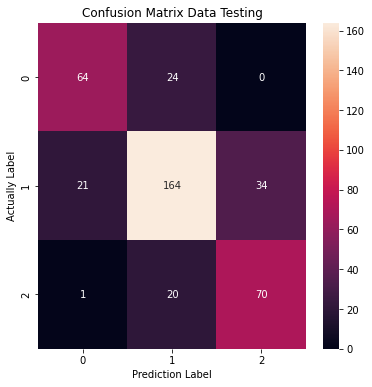

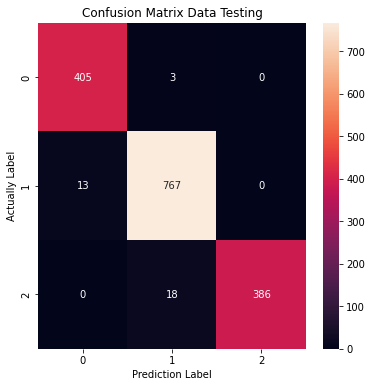

In [205]:
test_pred =model.predict(test_X)
train_pred=model.predict(train_X)
cm_test =confusion_matrix(test_y,test_pred)
cm_train= confusion_matrix(train_y,train_pred)
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix Data Testing')
sns.heatmap(cm_test,annot=True,fmt='d').get_figure().savefig('cm.png')
plt.xlabel('Prediction Label')
plt.ylabel('Actually Label')
plt.show()
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix Data Testing')
sns.heatmap(cm_train,annot=True,fmt='d').get_figure().savefig('cm.png')
plt.xlabel('Prediction Label')
plt.ylabel('Actually Label')
plt.show()